In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from medangel.data import preprocessing
from medangel.models import model_builder
from medangel.features import feature_creation

df = preprocessing.load_relevant_data()
minimum_features = feature_creation.extract_minimum_features(df)
comprehensive_features = feature_creation.extract_comprehensive_features(df)

Feature Extraction: 100%|██████████| 30/30 [01:39<00:00,  3.32s/it]


In [13]:
kmeans_minimum,scaled_minimum = model_builder.kmeans_clustering(minimum_features)

In [17]:
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation(random_state=0).fit(scaled_minimum)

In [18]:
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)



Estimated number of clusters: 79


In [19]:
cluster_centers_indices

array([  34,   43,   44,   46,   49,   63,   66,   70,   76,   83,   90,
         92,  110,  111,  112,  113,  115,  117,  121,  127,  151,  193,
        226,  261,  293,  299,  315,  316,  321,  372,  374,  380,  398,
        400,  404,  405,  418,  421,  427,  442,  463,  491,  507,  511,
        549,  550,  552,  660,  701,  720,  731,  740,  741,  842,  869,
        875,  876,  888,  889,  900,  902,  909,  919,  926,  932,  935,
        938,  962,  967,  982, 1003, 1009, 1011, 1015, 1041, 1081, 1089,
       1097, 1098], dtype=int64)

In [20]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [29]:
import numpy as np
bandwidth = estimate_bandwidth(scaled_minimum, quantile=0.9, n_samples=1104)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(scaled_minimum)
ms_labels = ms.labels_
ms_cluster_centers = ms.cluster_centers_

ms_labels_unique = np.unique(ms_labels)
ms_n_clusters_ = len(ms_labels_unique)

print("number of estimated clusters : %d" % ms_n_clusters_)

MeanShift(bandwidth=4.76869176258528, bin_seeding=True)

number of estimated clusters : 3


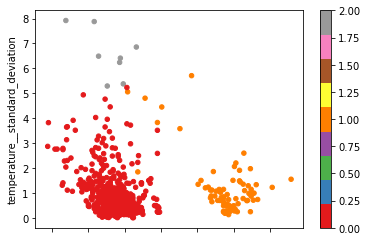

In [30]:
import matplotlib.cm as cm

minimum_features.plot.scatter(x="temperature__minimum", y="temperature__standard_deviation", c = ms_labels, cmap = cm.Set1)